<a href="https://colab.research.google.com/github/DAWUNHAN/deeplearning-fundamental/blob/master/3_Image/%5BProject%5D_%EC%9D%98%EB%A5%98_%EC%A7%81%EB%AC%BC_%EB%B6%88%EB%9F%89_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
- 데이터셋 출처 : AITEX (https://www.aitex.es/afid/)
- [데이터셋 다운로드](https://www.aitex.es/afid/)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opencv-python

In [4]:
PATH_DEFECT = '/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/Defect_images/'
PATH_MASK = '/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/Mask_images/'
PATH_NODEFECT = '/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/NODefect_images/'

In [16]:
import cv2
import os
import glob
import shutil
import random
import string
import numpy as np
import tensorflow as tf

In [6]:
random.seed(0)  # 랜덤 시드 고정

# 데이터 매칭
# glob.glob을 사용하면 우리가 원하는 특정 패턴으로 읽은 뒤 리스트에 넣을 수 있다.
defect_list = glob.glob(PATH_DEFECT + '*.png')
mask_list = glob.glob(PATH_MASK + '*.png')
pass_list = glob.glob(PATH_NODEFECT + '**/*.png')

# 마스크랑 defect 이미지를 하나의 쌍으로 묶는 작업
new_defect_list = list()
new_mask_list = list()
for defect in defect_list:
    num = defect.split('/')[-1].split('_')[0]           # defect_list 안에 있는 파일명에서 '/'를 기점으로 맨 뒷 부분을 가져온 뒤, '_' 앞 부분을 가져온다.
    for mask in mask_list:
        num_mask = mask.split('/')[-1].split('_')[0]    # mask_list에서도 같은 방식으로 파일명을 가져온다.
        if num == num_mask:                             # 이 두 파일명이 같자면 new list에 넣는다. 
            new_defect_list.append(defect)
            new_mask_list.append(mask)
            break
defect_list = new_defect_list
mask_list = new_mask_list

## 첫 발송 데이터 생성

In [7]:
# The first dataset given
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/1') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/1')
for file_name in pass_list + defect_list:
    if random.randint(0, 9) < 2:
        barcode = ''.join(random.choices(string.ascii_letters + string.digits, k=16)) # 파일명을 랜덤으로 만든다.
        shutil.copy2(file_name, '/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/1/' + barcode + '.png')

In [9]:
# The second dataset
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2')
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2/OK') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2/OK')
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2/FAIL') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2/FAIL')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 2:
            patch = img[:, w:w+height, :]
            cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2/OK/%04d.png' % idx, patch)
            idx += 1 

patch_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]
            if patch_d.sum() > 0:
                patch_list.append(patch)

random.shuffle(patch_list)
patch_list_fraction = patch_list[:len(patch_list)//3]
for idx, patch in enumerate(patch_list_fraction):
    cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2/FAIL/%04d.png' % idx, patch)

In [10]:
# The third dataset
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3')
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/OK') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/OK')
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/FAIL') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/FAIL')
if os.path.exists('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/MASK') is False:
    os.mkdir('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/MASK')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 3:
            patch = img[:, w:w+height, :]
            cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/OK/%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/FAIL/%04d.png' % idx, patch)
    cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/3/MASK/%04d.png' % idx, patch_d)

## 데이터셋 로드 함수 정의

In [12]:
def preprocess(file_name):
    img = tf.io.read_file(file_name)
    img = tf.image.decode_png(img, channels=1) #tensorflow 버전업으로 코드 변경
    return tf.image.convert_image_dtype(img, tf.float32)

In [14]:
EPOCHS = 10

DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/data/fabric_factory/2/'
DATASET_OK_PATTERN = DATASET_PATH + 'OK/*.png'
DATASET_FAIL_PATTERN = DATASET_PATH + 'FAIL/*.png'

RESULT_SAVE_PATH = 'results/'

In [17]:
ok_list = glob.glob(DATASET_OK_PATTERN)
ds_ok = tf.data.Dataset.list_files(ok_list)
ds_ok_label = tf.data.Dataset.from_tensor_slices([0] * len(ok_list))

ds_ok = ds_ok.map(preprocess)
ds_ok = tf.data.Dataset.zip((ds_ok, ds_ok_label))

fail_list = glob.glob(DATASET_FAIL_PATTERN)
ds_fail = tf.data.Dataset.list_files(fail_list)
ds_fail_label = tf.data.Dataset.from_tensor_slices([1] * len(fail_list))

ds_fail = ds_fail.map(preprocess)
ds_fail = tf.data.Dataset.zip((ds_fail, ds_fail_label))

ds = tf.data.Dataset.concatenate(ds_ok, ds_fail)

# 학습/검정 데이터 분리

In [20]:
ds_size = len(ok_list) + len(fail_list)
train_size = int(ds_size * 0.7)

ds = ds.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).batch(32)
ds_valid = ds.skip(train_size).batch(32)

# 모델 생성

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [22]:
def Model():
    return Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)), #tensorflow 버전업으로 코드 변경
                       MaxPool2D(),
                       Conv2D(64, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(128, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(256, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(1, activation='sigmoid')])

In [23]:
model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(ds_train, validation_data=ds_valid, epochs=EPOCHS)

Epoch 1/10
22/22 [==============================] - 19s 199ms/step - loss: 0.4778 - accuracy: 0.8728 - val_loss: 0.3343 - val_accuracy: 0.9000
Epoch 2/10
22/22 [==============================] - 8s 264ms/step - loss: 0.3611 - accuracy: 0.8891 - val_loss: 0.4857 - val_accuracy: 0.8552
Epoch 3/10
22/22 [==============================] - 7s 180ms/step - loss: 0.3375 - accuracy: 0.8876 - val_loss: 0.3499 - val_accuracy: 0.8759
Epoch 4/10
22/22 [==============================] - 7s 180ms/step - loss: 0.3654 - accuracy: 0.8802 - val_loss: 0.3604 - val_accuracy: 0.8759
Epoch 5/10
22/22 [==============================] - 10s 251ms/step - loss: 0.3721 - accuracy: 0.8624 - val_loss: 0.3329 - val_accuracy: 0.8897
Epoch 6/10
22/22 [==============================] - 7s 180ms/step - loss: 0.3613 - accuracy: 0.8728 - val_loss: 0.3268 - val_accuracy: 0.8862
Epoch 7/10
22/22 [==============================] - 7s 182ms/step - loss: 0.3554 - accuracy: 0.8787 - val_loss: 0.3315 - val_accuracy: 0.8931
Epoc

# 이미지로 결과 저장하기

In [26]:
def mkdir(path):
    if os.path.exists(path) is False:
        os.mkdir(path)

mkdir(RESULT_SAVE_PATH)
mkdir(RESULT_SAVE_PATH + '/TP')
mkdir(RESULT_SAVE_PATH + '/TN')
mkdir(RESULT_SAVE_PATH + '/FP')
mkdir(RESULT_SAVE_PATH + '/FN')

index = 0
for imgs, labels in ds_valid:
    preds = model.predict(imgs)
    for idx in range(imgs.shape[0]):
        gt = labels[idx].numpy()
        y = preds[idx]
        
        if gt == 1 and y > 0.5:
            path = RESULT_SAVE_PATH + '/TP'
        elif gt == 1 and y <= 0.5:
            path = RESULT_SAVE_PATH + '/FN'
        elif gt == 0 and y > 0.5:
            path = RESULT_SAVE_PATH + '/FP'
        else:
            path = RESULT_SAVE_PATH + '/TN'
            
        cv2.imwrite(path + '/%.4f_%04d.png' % (y, index), imgs[idx].numpy() * 255)
        index +=1

# Oversampling 

In [27]:
ok_list = glob.glob(DATASET_OK_PATTERN)
fail_list = glob.glob(DATASET_FAIL_PATTERN)

num_ok = len(ok_list)
num_fail = len(fail_list)

# Oversampling
fail_list_new = list()
for _ in range(num_ok // num_fail):
    fail_list_new += fail_list
fail_list_new += fail_list[: num_ok % num_fail]
fail_list = fail_list_new

ok_label = [0] * len(ok_list)
fail_label = [1] * len(fail_list)

file_list = ok_list + fail_list
label_list = ok_label + fail_label

# TFRecords

In [28]:
# Tensorflow official site에서 가져온 함수

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def image_example(image_string, label):
    image_shape = tf.image.decode_image(image_string).shape

    feature = {
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string),
    }

    return tf.train.Example(features=tf.train.Features(feature=feature))

In [30]:
TFRECORD_PATH = 'tfrecords/'
IMAGE_PER_TFRECORD = 100

if os.path.exists(TFRECORD_PATH) is False:
    os.mkdir(TFRECORD_PATH)

num_tfrecords = len(file_list) // IMAGE_PER_TFRECORD
if len(file_list) % IMAGE_PER_TFRECORD != 0:
    num_tfrecords += 1

for idx in range(num_tfrecords):
    idx0 = idx * IMAGE_PER_TFRECORD
    idx1 = idx0 + IMAGE_PER_TFRECORD
    record_file = TFRECORD_PATH + '%05d.tfrecords' % idx
    with tf.io.TFRecordWriter(record_file) as writer:
        for filename, label in zip(file_list[idx0:idx1],
                                   label_list[idx0:idx1]):
            image_string = open(filename, 'rb').read()
            tf_example = image_example(image_string, label)
            writer.write(tf_example.SerializeToString())

# Data Augmentation

In [34]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 10.9 MB/s 


In [35]:
import tensorflow_addons as tfa
import matplotlib.pyplot as plt

In [41]:
EPOCHS = 100
RESULT_SAVE_PATH = 'results/'

In [42]:
def preprocess(img):
    return tf.image.convert_image_dtype(img, tf.float32)

In [43]:
def augmentation(img, label):
    def flip(x):
        x = tf.image.random_flip_left_right(x)
        x = tf.image.random_flip_up_down(x)
        return x
    
    def rotate(x):
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                   lambda: tfa.image.rotate(x,
                                       tf.random.uniform(shape=[], minval=0.0, maxval=360.0, dtype=tf.float32),
                                       interpolation='BILINEAR'),
                   lambda: x)
        return x
    
    def translation(x):
        dx = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        dy = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                    lambda: tfa.image.transform(x,
                                                [0, 0, dx, 0, 0, dy, 0, 0],
                                                interpolation='BILINEAR'),
                    lambda: x)
        return x
    
    img = flip(img)
    img = rotate(img)
    img = translation(img)
           
    return img, label

# TFRecords 불러오기

In [44]:
tffiles = glob.glob('tfrecords/*')
raw_image_dataset = tf.data.TFRecordDataset(tffiles)

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

def _parse_image_label(parsed_dataset):
    return preprocess(tf.image.decode_png(parsed_dataset['image_raw'])), parsed_dataset['label']

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
dataset = parsed_image_dataset.map(_parse_image_label)

# 데이터 분리하기

In [46]:
ds_size = 0
for _ in dataset:
    ds_size += 1

train_size = int(ds_size * 0.7)

ds = dataset.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).prefetch(1024).batch(32).map(augmentation)
ds_valid = ds.skip(train_size).prefetch(1024).batch(32)

# 모델 정의

In [51]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Concatenate, Flatten, Dense

def Model():
    def inception(filters):
        def subnetwork(x):
            h1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
            h1 = MaxPool2D()(h1)
            
            h2 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(h2)
            h2 = MaxPool2D()(h2)
            
            h3 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(h3)
            h3 = MaxPool2D()(h3)
            return Concatenate()([h1, h2, h3])
        return subnetwork
    
    x = tf.keras.Input(shape=(256, 256, 3))
    h = inception(16)(x)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = Flatten()(h)
    h = Dense(1024, activation='relu')(h)
    y = Dense(1, activation='sigmoid')(h)
    return tf.keras.Model(inputs=x, outputs=y)

# 모델 생성하기

In [52]:
model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 모델 학습하기

In [53]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
history = model.fit(ds_train,
                    validation_data=ds_valid,
                    epochs=EPOCHS,
                    callbacks=[earlystopping])

Epoch 1/100
38/38 [==============================] - 27s 451ms/step - loss: 0.7232 - accuracy: 0.5080 - val_loss: 0.6903 - val_accuracy: 0.5265
Epoch 2/100
38/38 [==============================] - 17s 377ms/step - loss: 0.6951 - accuracy: 0.5030 - val_loss: 0.6875 - val_accuracy: 0.6660
Epoch 3/100
38/38 [==============================] - 18s 393ms/step - loss: 0.6927 - accuracy: 0.5046 - val_loss: 0.7160 - val_accuracy: 0.4715
Epoch 4/100
38/38 [==============================] - 16s 361ms/step - loss: 0.6932 - accuracy: 0.5055 - val_loss: 0.6884 - val_accuracy: 0.5088
Epoch 5/100
38/38 [==============================] - 18s 408ms/step - loss: 0.6920 - accuracy: 0.5300 - val_loss: 0.6906 - val_accuracy: 0.5147
Epoch 6/100
38/38 [==============================] - 17s 384ms/step - loss: 0.6912 - accuracy: 0.5131 - val_loss: 0.6895 - val_accuracy: 0.4931
Epoch 7/100
38/38 [==============================] - 18s 406ms/step - loss: 0.6939 - accuracy: 0.5021 - val_loss: 0.6853 - val_accuracy:

# 모델 저장하기

In [55]:
model.save('model/inception_model.h5')

# 학습 결과 확인하기

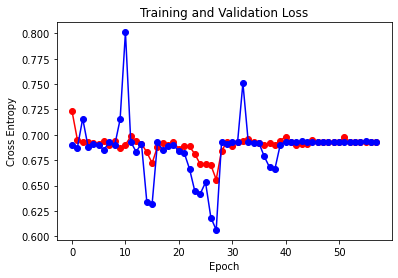

In [54]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
from google.colab import files
files.download('/content/model/inception_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>